In [331]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv
import os
from pathlib import Path
import seaborn as sns

In [335]:
import scipy

In [251]:
%matplotlib notebook

In [253]:
%matplotlib inline

In [174]:
path_US=Path("../NKD/New/Household_Icome.csv")
Household_df=pd.read_csv(path_US, encoding="UTF-8")
Household_df

,Year,Geographic Area Name,Households Estimate Total
0,2010,Alabama,1821210
1,2010,Alaska,248248
2,2010,Arizona,2326468
3,2010,Arkansas,1117154
4,2010,California,12392852
...,...,...,...
587,2020,Washington,2905822
588,2020,West Virginia,734235
589,2020,Wisconsin,2377935
590,2020,Wyoming,233231


In [176]:
Household_df=Household_df.rename(columns={'Geographic Area Name':'State'})
Household_df.head()

,Year,State,Households Estimate Total
0,2010,Alabama,1821210
1,2010,Alaska,248248
2,2010,Arizona,2326468
3,2010,Arkansas,1117154
4,2010,California,12392852


In [178]:
path=Path("../NKD/New/Population.csv")
Population_df=pd.read_csv(path, encoding="UTF-8")
Population_df.head()

,Item,State_Name,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,Population (Thousands),Alabama,4786000,4800000,4817000,4832000,4844000,4855000,4867000,4878000
1,Population (Thousands),Alaska,714000,722000,731000,738000,737000,738000,743000,741000
2,Population (Thousands),Arizona,6407000,6473000,6556000,6635000,6733000,6833000,6945000,7048000
3,Population (Thousands),Arkansas,2922000,2941000,2953000,2960000,2969000,2980000,2992000,3004000
4,Population (Thousands),California,37320000,37636000,37945000,38254000,38587000,38904000,39149000,39338000


### Looping through years and concatinating 

In [181]:
years_list_2=['Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014',
       'Y2015', 'Y2016', 'Y2017']
dfs_2=[]
for year in years_list_2:
    df=Population_df[["Item", "State_Name", year]]
    df=df.rename(columns={year:"Population"})
    df["Year"] = int(year.replace("Y",""))
    dfs_2.append(df)

In [183]:
fixed_df=pd.concat(dfs_2)

In [185]:
fixed_df.head()

,Item,State_Name,Population,Year
0,Population (Thousands),Alabama,4786000,2010
1,Population (Thousands),Alaska,714000,2010
2,Population (Thousands),Arizona,6407000,2010
3,Population (Thousands),Arkansas,2922000,2010
4,Population (Thousands),California,37320000,2010


In [79]:
# Renaming State_Name to State

fixed_df=fixed_df.rename(columns={'State_Name':'State'})
fixed_df.head()

,Item,State,Population,Year
0,Population (Thousands),Alabama,4786000,2010
1,Population (Thousands),Alaska,714000,2010
2,Population (Thousands),Arizona,6407000,2010
3,Population (Thousands),Arkansas,2922000,2010
4,Population (Thousands),California,37320000,2010


### Merging Population_df with Household_Income

In [47]:
merged_data_df=pd.merge(Household_df, fixed_df, on=['State', 'Year'], how='left')
merged_data_df

,Year,State,Households Estimate Total,Item,Population
0,2010,Alabama,1821210,Population (Thousands),4786000.0
1,2010,Alaska,248248,Population (Thousands),714000.0
2,2010,Arizona,2326468,Population (Thousands),6407000.0
3,2010,Arkansas,1117154,Population (Thousands),2922000.0
4,2010,California,12392852,Population (Thousands),37320000.0
...,...,...,...,...,...
587,2020,Washington,2905822,NaN,NaN
588,2020,West Virginia,734235,NaN,NaN
589,2020,Wisconsin,2377935,NaN,NaN
590,2020,Wyoming,233231,NaN,NaN


In [84]:
# Cleaningby dropping NaN 

clean_combined_Income_Population_df = merged_data_df.dropna(how="any")
clean_combined_Income_Population_df

,Year,State,Households Estimate Total,Item,Population
0,2010,Alabama,1821210,Population (Thousands),4786000.0
1,2010,Alaska,248248,Population (Thousands),714000.0
2,2010,Arizona,2326468,Population (Thousands),6407000.0
3,2010,Arkansas,1117154,Population (Thousands),2922000.0
4,2010,California,12392852,Population (Thousands),37320000.0
...,...,...,...,...,...
424,2017,Virginia,3105636,Population (Thousands),8471000.0
425,2017,Washington,2755697,Population (Thousands),7428000.0
426,2017,West Virginia,737671,Population (Thousands),1819000.0
427,2017,Wisconsin,2328754,Population (Thousands),5793000.0


In [90]:
#Dropping ['Item']

Income_Population_df=clean_combined_Income_Population_df[['Year', 'State', 'Households Estimate Total', 'Population']]
Income_Population_df

,Year,State,Households Estimate Total,Population
0,2010,Alabama,1821210,4786000.0
1,2010,Alaska,248248,714000.0
2,2010,Arizona,2326468,6407000.0
3,2010,Arkansas,1117154,2922000.0
4,2010,California,12392852,37320000.0
...,...,...,...,...
424,2017,Virginia,3105636,8471000.0
425,2017,Washington,2755697,7428000.0
426,2017,West Virginia,737671,1819000.0
427,2017,Wisconsin,2328754,5793000.0


In [96]:
Income_Population_df.dtypes

Year                           int64
State                         object
Households Estimate Total     object
Population                   float64
dtype: object

### Changing types of dataframe using .astype()

In [114]:
Income_Population_df=Income_Population_df.astype({'Households Estimate Total': 'int64'}, errors='raise')
Income_Population_df.dtypes

Year                           int64
State                         object
Households Estimate Total      int64
Population                   float64
dtype: object

In [116]:
Income_Population_df=Income_Population_df.astype({'Population': 'int64'}, errors='raise')
Income_Population_df.dtypes

Year                          int64
State                        object
Households Estimate Total     int64
Population                    int64
dtype: object

### Calculating Income per indivudual

In [118]:
Income_Population_df['Income']=Income_Population_df['Households Estimate Total']/Income_Population_df['Population']
Income_Population_df

,Year,State,Households Estimate Total,Population,Income
0,2010,Alabama,1821210,4786000,0.380529
1,2010,Alaska,248248,714000,0.347686
2,2010,Arizona,2326468,6407000,0.363113
3,2010,Arkansas,1117154,2922000,0.382325
4,2010,California,12392852,37320000,0.332070
...,...,...,...,...,...
424,2017,Virginia,3105636,8471000,0.366620
425,2017,Washington,2755697,7428000,0.370988
426,2017,West Virginia,737671,1819000,0.405537
427,2017,Wisconsin,2328754,5793000,0.401994


In [127]:
Income_Population_df.to_csv("../NKD/New/IncomePerPop.csv", encoding="UTF-8", index=False, header=True)

In [163]:
path_US_Spending=Path('../NKD/New/Final/Final_Spending.csv')
US_Spending_df=pd.read_csv(path_US_Spending, encoding="UTF-8")
US_Spending_df

,Year,State,Sum_Spending
0,2010,Alabama,12811.0
1,2010,Alaska,17853.0
2,2010,Arizona,12040.0
3,2010,Arkansas,12756.0
4,2010,California,12960.0
...,...,...,...
403,2017,Virginia,16351.0
404,2017,Washington,16555.0
405,2017,West Virginia,22034.0
406,2017,Wisconsin,18038.0


In [165]:
Final_merged_df=pd.merge(Income_Population_df, US_Spending_df, on=['Year', 'State'], how='left')
Final_merged_df

,Year,State,Households Estimate Total,Population,Income,Sum_Spending
0,2010,Alabama,1821210,4786000,0.380529,12811.0
1,2010,Alaska,248248,714000,0.347686,17853.0
2,2010,Arizona,2326468,6407000,0.363113,12040.0
3,2010,Arkansas,1117154,2922000,0.382325,12756.0
4,2010,California,12392852,37320000,0.332070,12960.0


In [361]:
d_slope, d_int, d_r, d_p, d_std_err = scipy.stats.linregress(Final_merged_df['Income'], Final_merged_df['Sum_Spending'])

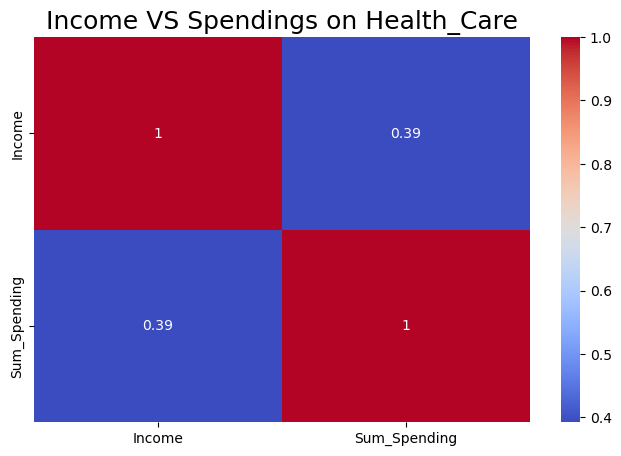

In [187]:
plt.figure(figsize=(8,5))
corr_matrix = Final_merged_df[['Income', 'Sum_Spending']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Income VS Spendings on Health_Care', size=18)
plt.show()

LinregressResult(slope=50131.12073102496, intercept=-2509.7458004000473, rvalue=0.3921838859792541, pvalue=1.88112234859158e-16, stderr=5835.647595283353, intercept_stderr=2196.2134817960173)

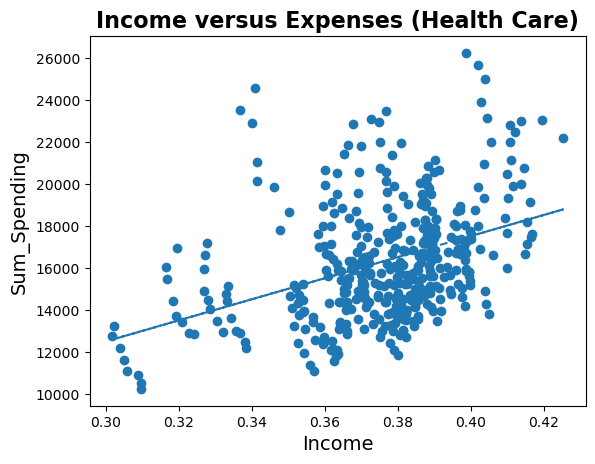

In [400]:
# Scatter plot Income VS Spending

plt.scatter(Final_merged_df['Income'], Final_merged_df['Sum_Spending'])
plt.xlabel('Income', fontsize=14)
plt.ylabel('Sum_Spending', fontsize=14)
plt.title('Income versus Expenses (Health Care)', fontsize=16, fontweight="bold")

d_fit = d_slope * (Final_merged_df['Income']) + d_int
plt.plot(Final_merged_df['Income'],d_fit,"--")

stats = scipy.stats.linregress(Final_merged_df['Income'],Final_merged_df['Sum_Spending'])
plot.show

In [232]:
plt.savefig("../NKD/New/Final/HeadMap_IncomeSpending.png")

<Figure size 640x480 with 0 Axes>

In [446]:
Final_merged_df['By_year'].unique()

array([nan])

In [472]:
by_state = Final_merged_df.groupby('State')['Income'].mean().reset_index()
by_state.rename(columns = {'Income':'Average Income'})

,State,Average Income
0,Alabama,0.380750
1,Alaska,0.343070
2,Arizona,0.356806
3,Arkansas,0.381787
4,California,0.328436
5,Colorado,0.374690
6,Connecticut,0.378434
7,Delaware,0.365731
8,District of Columbia,0.408411
9,Florida,0.366467


In [474]:
by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   Income  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Tex

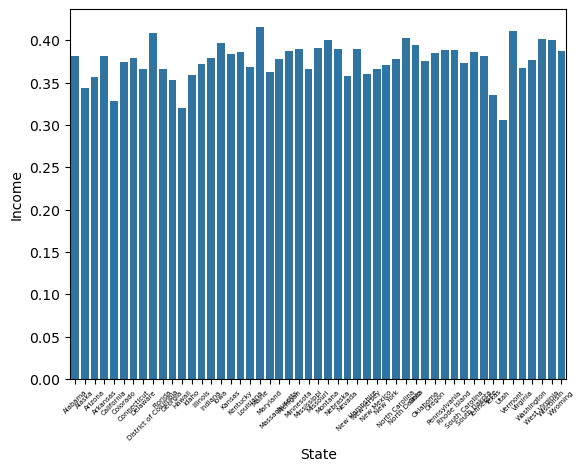

In [490]:
figsize = (20,10)
sns.barplot(data = by_state, x = 'State', y = 'Income')
plt.xticks(rotation = 45, fontsize = 5)

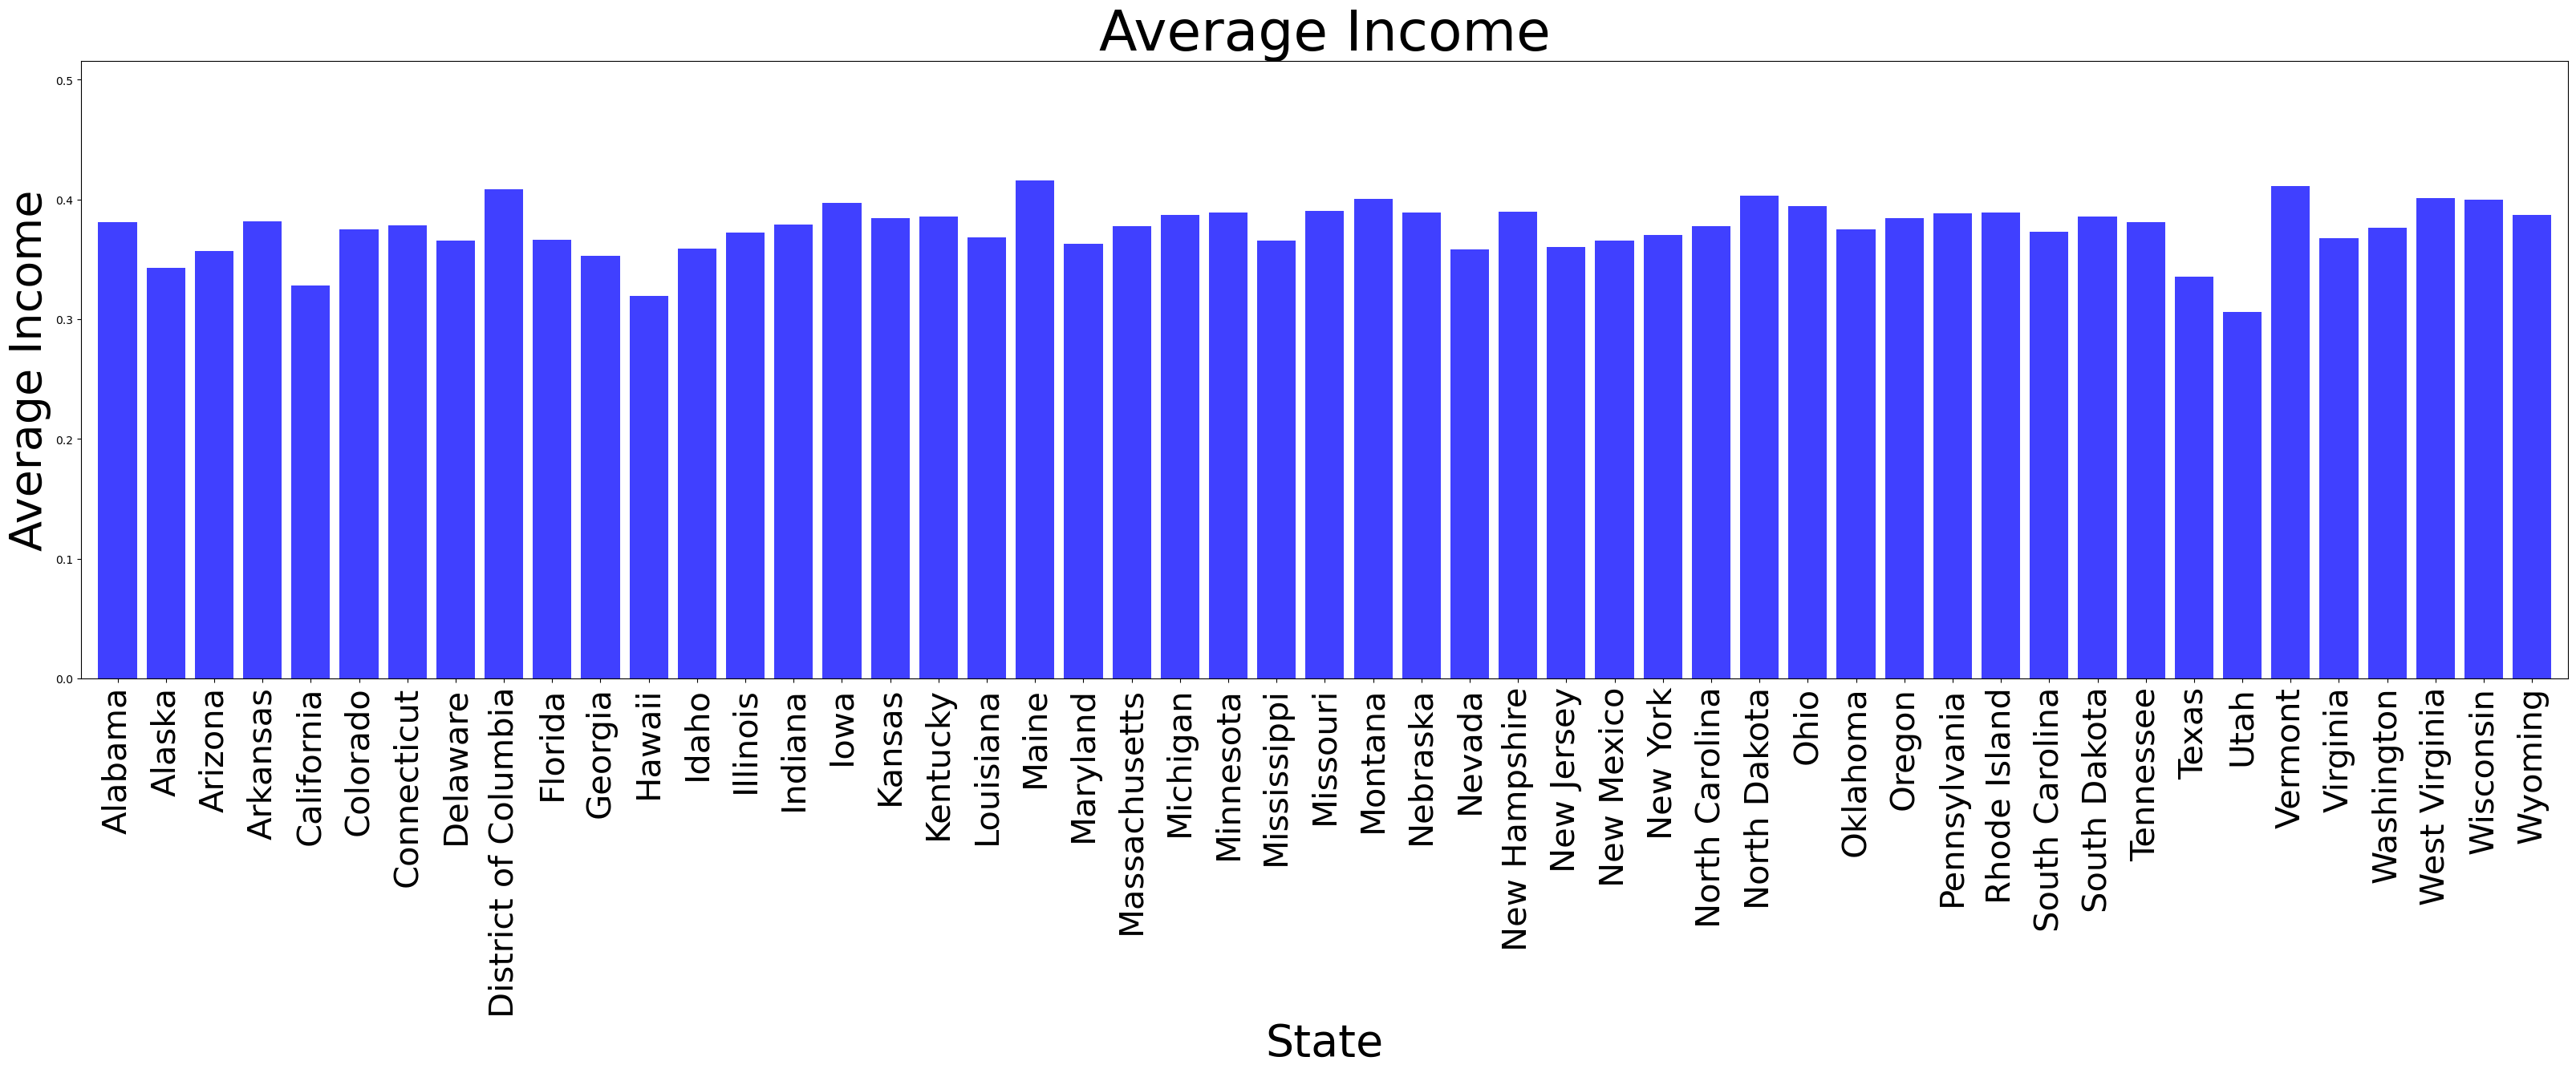

In [588]:

x_axis = np.arange(0, len(by_state['State']))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.figure(figsize=(40,10))
plt.title("Average Income", fontsize=50)
plt.xlabel("State", fontsize=40), 
plt.ylabel("Average Income", fontsize=40 )

plt.xlim(-0.75, len(by_state['State'])-.25)
plt.ylim(0, max(by_state['Income']) + 0.1)

plt.bar(x_axis, by_state['Income'], facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, by_state['State'], rotation='vertical', fontsize=30)
plt.show()

In [518]:
Final_merged_df.head()

,Year,State,Households Estimate Total,Population,Income,Sum_Spending,By_year,
0,2010,Alabama,1821210,4786000,0.380529,12811.0,NaN,NaN
1,2010,Alaska,248248,714000,0.347686,17853.0,NaN,NaN
2,2010,Arizona,2326468,6407000,0.363113,12040.0,NaN,NaN
3,2010,Arkansas,1117154,2922000,0.382325,12756.0,NaN,NaN
4,2010,California,12392852,37320000,0.332070,12960.0,NaN,NaN


In [434]:
#by_year_state['mean_income'] = Final_merged_df.groupby('State')['Income'].mean()
by_year

In [436]:
by_year_state.head()


State
Alabama        0.38075
Alaska         0.34307
Arizona       0.356806
Arkansas      0.381787
California    0.328436
Name: Income, dtype: object

In [438]:
sns.barplot(data = by_year_state, x = 'State')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [223]:
Spending_path=Path('../Team-3-The-Outliers/NKD/New/Spending_Items.csv')
Spending_Items_df=pd.read_csv(Spending_path, encoding="UTF-8")
Spending_Items_df

,Year,State,Dental Services ($),Durable Medical Products ($),Home Health Care ($),Hospital Care ($),Nursing Home Care ($),"Other Health, Residential, and Personal Care ($)",Other Professional Services ($),Personal Health Care ($),Physician & Clinical Services ($),Prescription Drugs and Other Non-durable Medical Products ($),Sum_Spending
0,2010,Alabama,265.0,125.0,196.0,2177.0,381.0,296.0,147.0,6406.0,1560.0,1258.0,12811.0
1,2010,Alaska,471.0,118.0,145.0,3768.0,171.0,634.0,341.0,8927.0,2595.0,683.0,17853.0
2,2010,Arizona,311.0,160.0,124.0,2233.0,259.0,382.0,211.0,6020.0,1563.0,777.0,12040.0
3,2010,Arkansas,272.0,84.0,147.0,2359.0,435.0,425.0,203.0,6378.0,1396.0,1057.0,12756.0
4,2010,California,380.0,86.0,245.0,2311.0,325.0,290.0,208.0,6480.0,1805.0,830.0,12960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,440.0,147.0,222.0,2897.0,454.0,493.0,273.0,8176.0,2127.0,1122.0,16351.0
404,2017,Washington,550.0,158.0,191.0,3105.0,391.0,554.0,365.0,8278.0,2216.0,747.0,16555.0
405,2017,West Virginia,345.0,198.0,371.0,4849.0,696.0,602.0,296.0,11017.0,2164.0,1496.0,22034.0
406,2017,Wisconsin,447.0,137.0,259.0,3538.0,519.0,422.0,265.0,9019.0,2470.0,962.0,18038.0


In [225]:
Final_all_df=pd.merge(Income_Population_df, Spending_Items_df, on=['Year', 'State'], how='left')
Final_all_df.head()

,Year,State,Households Estimate Total,Population,Income,Dental Services ($),Durable Medical Products ($),Home Health Care ($),Hospital Care ($),Nursing Home Care ($),"Other Health, Residential, and Personal Care ($)",Other Professional Services ($),Personal Health Care ($),Physician & Clinical Services ($),Prescription Drugs and Other Non-durable Medical Products ($),Sum_Spending
0,2010,Alabama,1821210,4786000,0.380529,265.0,125.0,196.0,2177.0,381.0,296.0,147.0,6406.0,1560.0,1258.0,12811.0
1,2010,Alaska,248248,714000,0.347686,471.0,118.0,145.0,3768.0,171.0,634.0,341.0,8927.0,2595.0,683.0,17853.0
2,2010,Arizona,2326468,6407000,0.363113,311.0,160.0,124.0,2233.0,259.0,382.0,211.0,6020.0,1563.0,777.0,12040.0
3,2010,Arkansas,1117154,2922000,0.382325,272.0,84.0,147.0,2359.0,435.0,425.0,203.0,6378.0,1396.0,1057.0,12756.0
4,2010,California,12392852,37320000,0.332070,380.0,86.0,245.0,2311.0,325.0,290.0,208.0,6480.0,1805.0,830.0,12960.0


In [227]:
Final_all_df.columns

Index(['Year', 'State', 'Households Estimate Total', 'Population', 'Income',
       'Dental Services ($)', 'Durable Medical Products ($)',
       'Home Health Care ($)', 'Hospital Care ($)', 'Nursing Home Care ($)',
       'Other Health, Residential, and Personal Care ($)',
       'Other Professional Services ($)', 'Personal Health Care ($)',
       'Physician & Clinical Services ($)',
       'Prescription Drugs and Other Non-durable Medical Products ($)',
       'Sum_Spending'],
      dtype='object')

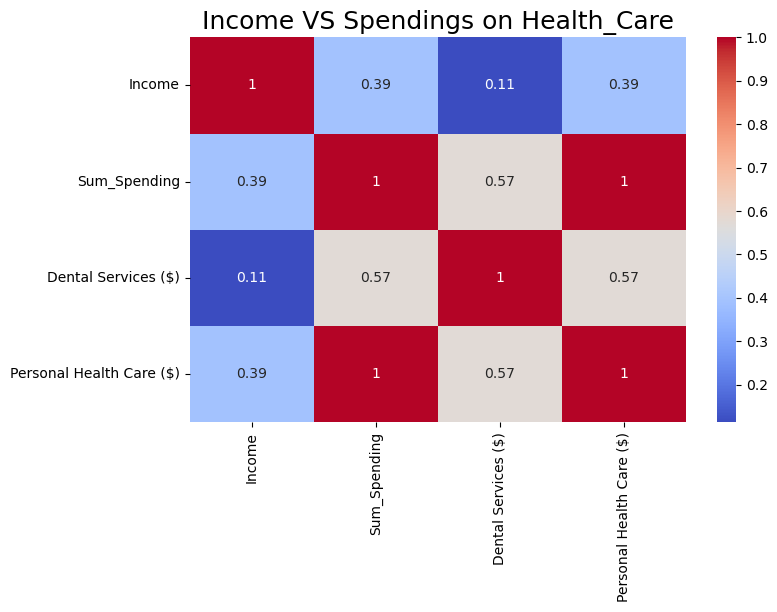

In [229]:
plt.figure(figsize=(8,5))
corr_matrix = Final_all_df[['Income', 'Sum_Spending', 'Dental Services ($)','Personal Health Care ($)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Income VS Spendings on Health_Care', size=18)
plt.show()